In [1]:
from final_algo import partial_corr, partial_cov, get_batch, get_edges
import numpy as np
import itertools
from paper_sims_util import their_random_graph_2, MCC, confusion

In [2]:
import matplotlib.pyplot as plt

In [7]:
p = 100
omega = their_random_graph_2(p, d=0.05)
sigma = np.linalg.inv(omega)
N = 10000
X = np.random.multivariate_normal(mean = np.zeros(p), cov = np.linalg.inv(omega), size = N)

In [9]:
early_stop = 4
verbose = False
N, p = X.shape
M = int(np.power(N, 0.5))
if not early_stop:
    early_stop = p

l = 2
edge_deleted = True
hypothesis_graph = np.ones((p,p))

while edge_deleted and l < early_stop:
    l = l+1
    print("Working on l = {}".format(l))
    all_subsets = list(itertools.combinations(range(p), l))
    edge_deleted = False
    for edge in get_edges(hypothesis_graph): 
        i, j = edge
        rhos= []
        trues = []
        for s in all_subsets:
            if i not in s or j not in s:
                continue
            s = list(s)
            batch = get_batch(X, M)
            sample_cov = np.cov(batch.T)

            true = partial_corr(sigma, s, i, j)
            rho = partial_corr(sample_cov, s, i, j)
            rhos.append(rho)
            trues.append(true)
            if rho < 0:
                #print('Deleted {} {}'.format(i, j))
                if omega[i, j] < 0:
                    pass
                    #print(i, j, omega[i,j])
                    #print(list(zip(trues, rhos)))
                    #print(rhos)
                edge_deleted = True
                hypothesis_graph[i, j] = 0
                hypothesis_graph[j, i] = 0
                break
        #assert len(rhos) > 0, (len(rhos), i, j)
        # if omega[i, j] == 0 and min(rhos) > 0:
        #     if verbose:
        #         print("False positive")
            #print(trues)
            #print(rhos)

Working on l = 3
Working on l = 4


In [10]:
confusion(hypothesis_graph, omega)

(16, 4895, 0, 39)

In [94]:
#generate random cobvariance with diagonal 1
#size is 5
p = 2
N = 50
# omega = their_random_graph_2(2, 2)
# sigma = np.linalg.inv(omega)
# M = np.max(np.diag(omega))
# print("M", M)

omega = np.array([[1, -0.3],[-0.3, 1]])
sigma = np.linalg.inv(omega)
print(sigma)
i = 0
j = 1
rho_ij = omega[i,j] / np.sqrt(omega[i,i] * omega[j,j])
print(rho_ij)

[[1.0989011  0.32967033]
 [0.32967033 1.0989011 ]]
-0.3


In [95]:
diffs = []
for t in range(10000):
    X = np.random.multivariate_normal(np.zeros(p), sigma, N)
    hatsigma = np.cov(X.T)
    hatomega = np.linalg.inv(hatsigma)
    hatrho_ij = hatomega[i,j] / np.sqrt(hatomega[i,i] * hatomega[j,j])
    diff = hatrho_ij - rho_ij
    diffs.append(diff)

(array([4.300e+01, 5.170e+02, 1.954e+03, 3.151e+03, 2.616e+03, 1.265e+03,
        3.620e+02, 8.400e+01, 7.000e+00, 1.000e+00]),
 array([-0.41181414, -0.30382318, -0.19583223, -0.08784128,  0.02014968,
         0.12814063,  0.23613158,  0.34412254,  0.45211349,  0.56010444,
         0.6680954 ]),
 <a list of 10 Patch objects>)

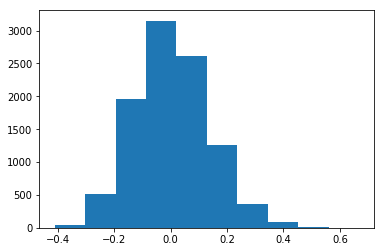

In [96]:
plt.hist(diffs)

In [97]:
eps = abs(rho_ij)

In [98]:
sum(diffs >= eps) / len(diffs)

0.0186

In [43]:
(1-0.0069)**15000

7.847446445932518e-46

In [44]:
np.log(15000)

9.615805480084347

In [68]:
(1-0.000001)**15000

0.9851119322142933

In [38]:
1 - (1-0.0069)**(15000) #15000 < 20 choose 5

1.0

In [29]:
print(24 * np.exp(- (N * M * eps**2) / 204800))

23.997512144334134
